1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [56]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

from resource import *

In [57]:
X_train, y_train, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=25,
                                         coef=True,
                                         random_state=42)
# data_train = pd.DataFrame({'X': X_train[:, 0], 'Y': y_train})
data_train = pd.DataFrame({'X1': X_train[:, 0], 'X2': X_train[:, 1], 'Y': y_train})
X = data_train.drop('Y', axis=1)
Y = data_train['Y']

In [58]:
coef

array([40.71064891,  6.60098441])

In [59]:
np.linalg.inv(X.T @ X) @ X.T @ Y

0    41.608344
1     7.097666
dtype: float64

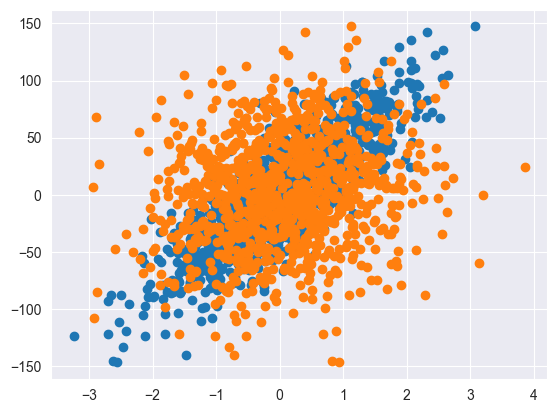

In [60]:
# посмотрим, что получилось

plt.plot(X_train, y_train, 'o')
plt.show()

In [61]:
from sklearn.linear_model import SGDRegressor

skl_regressor = SGDRegressor(max_iter=int(1e6), tol=1e-5, eta0=1e-3)
skl_l = skl_regressor.fit(X, Y)
skl_predictions = skl_regressor.predict(X)

print(skl_regressor.coef_, skl_regressor.intercept_)

[41.59415109  7.09384786] [0.04187891]


## Pseudocode
[Математические методы распознавания образов (курс лекций, В.В.Китов)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29)

```{python}
1. function gd(X, alpha, epsilon):
2. initialise beta
3. do:
4.  Beta = new_beta
5.  new_Beta = Beta - alpha*grad(X, beta)
6. until dist(new_beta, beta) < epsilon
7. return beta
```

## Stochastic gradient descent

```{python}
1. function sgd(X, alpha, epsilon):
2. initialise beta
3. do:
4.  X = shuffle(X)
5.  for x in X:
6.      Beta = new_beta
7.      new_Beta = Beta - alpha*grad(x, beta)
8. until dist(new_beta, beta) < epsilon
9. return beta
```

In [62]:
def plot_learning_curves(samples=X, targets=Y, model=None, x_lim=None, y_lim=None, learning_rates=None, diff_mse_values=None):
    if diff_mse_values is None:
        diff_mse_values = [1e-2, 1e-3, 1e-4, 1e-6]
    if learning_rates is None:
        learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]

    fig = plt.figure()
    fig.set_size_inches(13, 10)

    for item, diff_mse in enumerate(diff_mse_values):
        ax = fig.add_subplot(2, 2, item + 1)
        mse_values = []

        for lr in learning_rates:
            model = model(samples=samples, targets=targets, alpha=lr, diff_mse=diff_mse)
            model.fit()
            learning_path = model.loss_dict

            plt.plot(learning_path.keys(), learning_path.values())
            plt.title(f'diff_mse = {diff_mse}')
            plt.ylim(y_lim[0], y_lim[1])
            plt.xlim(x_lim[0], x_lim[1])

            mse_values.append(str(round(list(learning_path.values())[-1], ndigits=4)))

        plt.ylabel('Среднеквадратическая ошибка')
        plt.xlabel('Номер итерации')
        plt.legend([f'Скорость обучения равна {learning_rates[i]} с MSE = {mse_values[i]}' for i in range(len(learning_rates))])
        # plt.legend([f'Learning rate equals to {rates[i]} with Q = {Q_values[i]}' for i in range(len(rates))])

    fig.tight_layout()
    plt.show()

In [67]:
regressor = MyGradientLinearRegression(samples=X, targets=Y, alpha=1e-3, diff_mse=1e-5, print_cost=True)

l = regressor.fit()

# predictions = regressor.predict()
w = regressor.get_weights()
w

Cost at iteration 100 is 1687.34070941454, weight=[7.79887854 2.14676628 1.10441077]
Cost at iteration 200 is 1351.7237648856071, weight=[13.50991193  3.08415543  1.14261745]
Cost at iteration 300 is 1120.3718221545817, weight=[18.25494192  3.84223123  1.13386208]
Cost at iteration 400 is 960.837635244128, weight=[22.19760136  4.45557597  1.0936266 ]
Cost at iteration 500 is 850.7905099612778, weight=[25.47376091  4.95205831  1.03336611]
Cost at iteration 600 is 774.8556447659914, weight=[28.19624744  5.35414343  0.96145394]
Cost at iteration 700 is 722.443146008736, weight=[30.458759    5.67994636  0.88391713]
Cost at iteration 800 is 686.2560764833298, weight=[32.33911344  5.94407925  0.80500739]
Cost at iteration 900 is 661.2646564524945, weight=[33.90194421  6.15833282  0.72764269]
Cost at iteration 1000 is 644.0006441423611, weight=[35.20093778  6.33222466  0.65374774]
Cost at iteration 1100 is 632.0717443509789, weight=[36.28069064  6.4734404   0.58451524]
Cost at iteration 1200 

array([41.55392922,  7.09084852,  0.05130972])

Model alpha: 0.001, diff_mse: 1e-05, iterations: 3603 ...


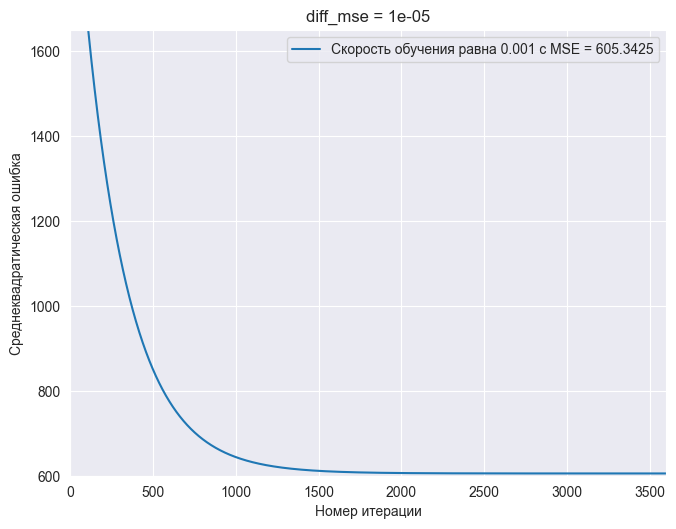

In [80]:
plot_learning_curves(model=MyGradientLinearRegression, x_lim=[0, 3600], y_lim=[600, 1650], learning_rates=[1e-3], diff_mse_values=[1e-5])

In [68]:
class MySGDLinearRegression(MyGradientLinearRegression):

    def _calc_gradient(self):
        n, k = self.samples.shape
        ind = np.random.randint(n)

        pred = self.samples[ind].reshape(-1, k) @ self.weight
        grad = 2 * (pred - self.targets[ind]) @ self.samples[ind].reshape(-1, k)

        return grad

In [69]:
sgd_regressor = MySGDLinearRegression(samples=X, targets=Y, alpha=1e-3, diff_mse=1e-5, print_cost=True)

sgd_l = sgd_regressor.fit()

# sgd_predictions = sgd_regressor.predict()
sgd_w = sgd_regressor.get_weights()
sgd_w

Cost at iteration 100 is 1714.6859458175811, weight=[7.41677822 1.90914411 0.50506876]
Cost at iteration 200 is 1370.156773261013, weight=[13.30069585  2.3836225   0.17816573]
Cost at iteration 300 is 1140.397105642881, weight=[17.9429984   3.01825793  0.63752829]
Cost at iteration 400 is 975.7718901685917, weight=[21.94493238  3.5467      0.87426033]
Cost at iteration 500 is 871.0927363518267, weight=[25.00887394  3.84521087  1.11861013]
Cost at iteration 600 is 802.7460496796956, weight=[27.20808868  4.7915227   1.15475291]
Cost at iteration 700 is 718.8071076253527, weight=[30.55934491  6.48859616  0.99759776]
Cost at iteration 800 is 679.8041409253677, weight=[32.65167975  7.5980687   0.68826571]
Cost at iteration 900 is 657.249492953866, weight=[34.33178326  7.9224179   1.7644577 ]
Cost at iteration 1000 is 644.17079627078, weight=[35.2471493   7.94266261  1.07169867]
Cost at iteration 1100 is 642.8553548859495, weight=[35.32717654  8.07333278  0.55754778]
Cost at iteration 1200 i

array([40.64203502,  6.1750313 , -0.31853667])

Model alpha: 0.001, diff_mse: 1e-05, iterations: 2881 ...


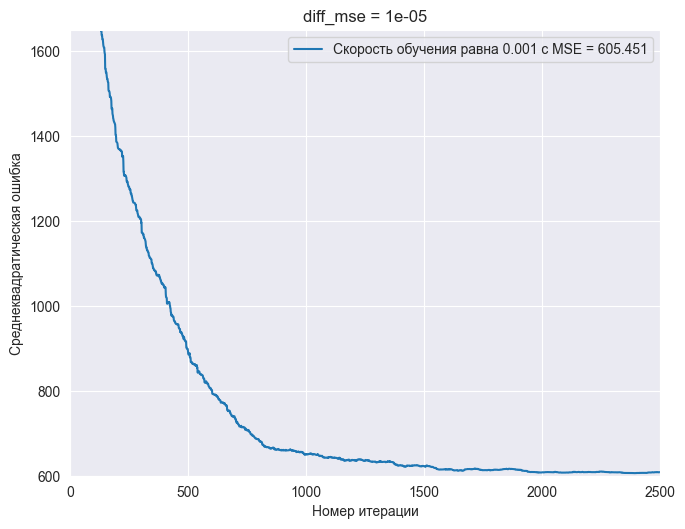

In [79]:
plot_learning_curves(model=MySGDLinearRegression, x_lim=[0, 2500], y_lim=[600, 1650], learning_rates=[1e-3], diff_mse_values=[1e-5])

In [70]:
class MySGDBatchLinearRegression(MyGradientLinearRegression):

    def __init__(self, batch_size=32, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_size = batch_size

    def _calc_gradient(self):
        n, k = self.samples.shape

        # Выбор случайных индексов
        indices = np.random.choice(np.arange(n), size=self.batch_size, replace=False)

        # Вычисление предсказаний и градиента
        pred = self.samples[indices] @ self.weight
        grad = 2 * (pred - self.targets[indices]) @ self.samples[indices] / self.batch_size

        return grad


In [71]:
sgd_bach_regressor = MySGDBatchLinearRegression(samples=X, targets=Y,
                                                alpha=1e-3, diff_mse=1e-5,
                                                batch_size=64,
                                                print_cost=True)

sgd_bach_l = sgd_bach_regressor.fit()

sgd_bach_w = sgd_bach_regressor.get_weights()
sgd_bach_w  # ideal [41.59177174  7.09518436] [0.04149802]

Cost at iteration 100 is 1682.4867896077299, weight=[7.91050276 1.94133113 1.21997276]
Cost at iteration 200 is 1348.9749342862856, weight=[13.57587043  3.0055196   1.29725221]
Cost at iteration 300 is 1120.3510069439067, weight=[18.27856191  3.70782235  1.29234334]
Cost at iteration 400 is 962.5247094051567, weight=[22.18996203  4.22733521  1.25249181]
Cost at iteration 500 is 850.764759332824, weight=[25.5121124   4.72529694  1.10591408]
Cost at iteration 600 is 776.3169315684698, weight=[28.18772557  5.05147668  1.04070884]
Cost at iteration 700 is 723.7002221970188, weight=[30.43727177  5.45830796  1.01352851]
Cost at iteration 800 is 687.8221788476744, weight=[32.27859315  5.78468081  0.94200199]
Cost at iteration 900 is 661.9538300269134, weight=[33.88230825  5.97307699  0.75095828]
Cost at iteration 1000 is 644.6361789961877, weight=[35.16033871  6.22327247  0.61095123]
Cost at iteration 1100 is 632.1911506119319, weight=[36.27984553  6.37104824  0.5354959 ]
Cost at iteration 12

array([41.03439102,  6.99022068,  0.08697349])

Model alpha: 0.001, diff_mse: 1e-05, iterations: 3114 ...


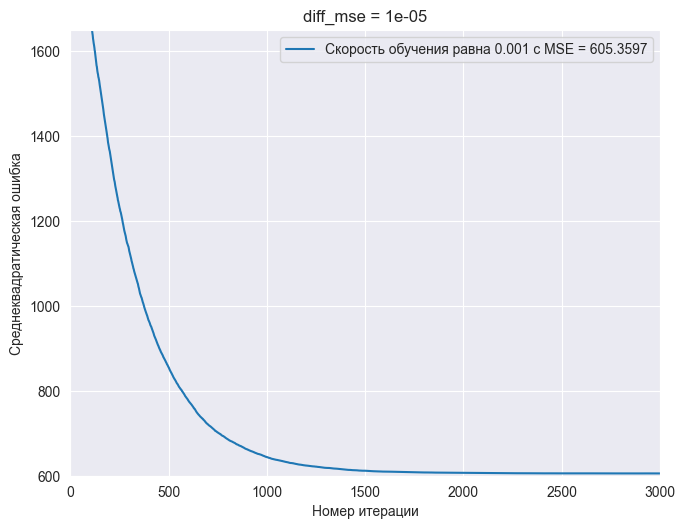

In [78]:
plot_learning_curves(model=MySGDBatchLinearRegression, x_lim=[0, 3000], y_lim=[600, 1650], learning_rates=[1e-3], diff_mse_values=[1e-5])

In [72]:
class MyMiniBatchLinearRegression(MyGradientLinearRegression):
    def __init__(self, batch_size=32, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_size = batch_size

    def _calc_gradient(self):
        n, k = self.samples.shape
        n_batches = n // self.batch_size
        if n % self.batch_size != 0:
            n_batches += 1

        gradient = np.zeros(k)

        for b in range(n_batches):
            start = b * self.batch_size
            end = (b + 1) * self.batch_size
            X_batch = self.samples[start:end]
            y_batch = self.targets[start:end]

            # Compute gradient for the batch
            pred = X_batch @ self.weight
            grad = 2 * (pred - y_batch) @ X_batch
            gradient += grad

        return gradient / n_batches


In [73]:
mini_bach_regressor = MyMiniBatchLinearRegression(samples=X, targets=Y,
                                                alpha=1e-3, diff_mse=1e-5,
                                                batch_size=32,
                                                print_cost=True)

mini_bach_l = mini_bach_regressor.fit()

mini_bach_w = mini_bach_regressor.get_weights()
mini_bach_w

Cost at iteration 100 is 605.3524904376626, weight=[41.49228273  7.08532127  0.06391082]
Model alpha: 0.001, diff_mse: 1e-05, iterations: 143 ...


array([4.15984087e+01, 7.09476500e+00, 4.15082584e-02])

Model alpha: 0.001, diff_mse: 1e-05, iterations: 143 ...


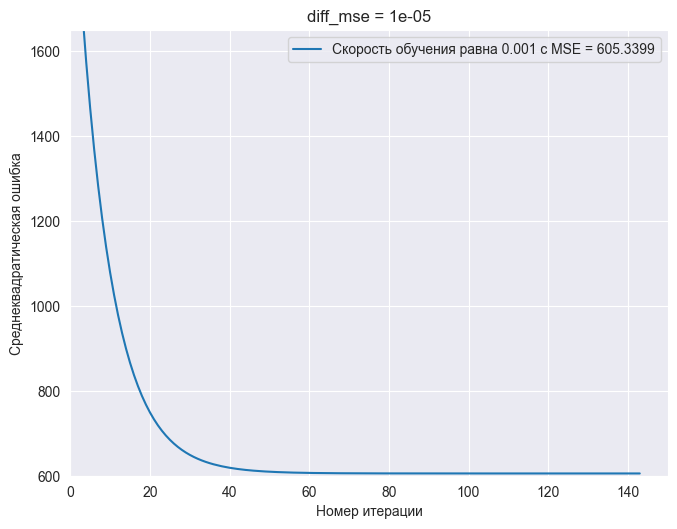

In [76]:
plot_learning_curves(model=MyMiniBatchLinearRegression, x_lim=[0, 150], y_lim=[600, 1650], learning_rates=[1e-3], diff_mse_values=[1e-5])

2. [*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).